In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

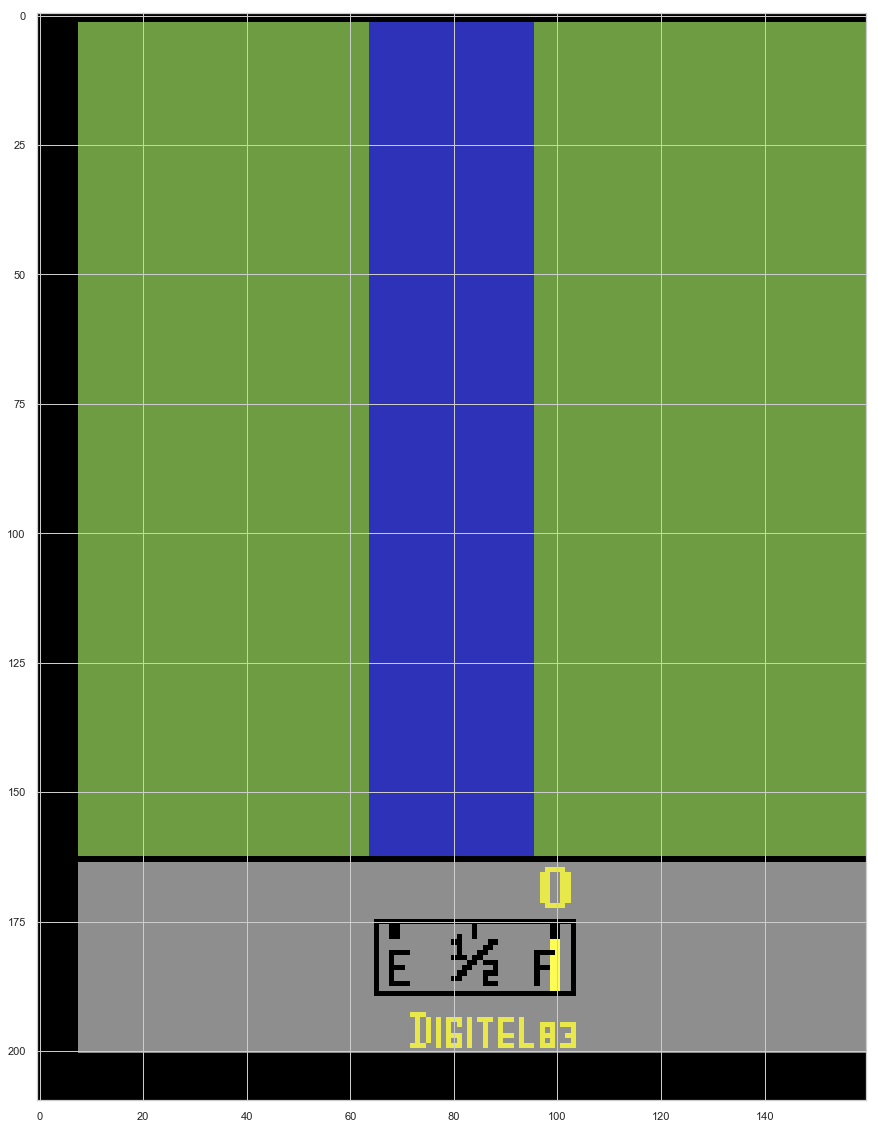

In [2]:
import gym
import atari_py as ap
from gym import envs
from IPython import display
%matplotlib inline
plt.figure(figsize=(20,20))

env = gym.make('Riverraid-v0')
env.reset()

#for i in range(200):
#  action = env.action_space.sample()
#  state, reward, done, info = env.step(action)
#  lives = info['ale.lives']
#  print(reward, lives)

plt.imshow(env.render(mode='rgb_array'))


In [ ]:
import numpy as np

# Initialize the Q matrix
max_step = 10000
all_states = 18
epochs = 1000000

gamma = 0.9
alpha = 0.75

env.reset()

Q=np.zeros((all_states, max_step))
Q.fill(-1.1)


def maximum(Q, t):
    """
    Return best option for the given state
    """
    m = -np.inf
    mi = 0
    for act in range(all_states):
        current = Q[act, t]
        if current>m:
            m = current
            mi = act
    return m, mi

t=0
resets = 0
old_lives = None
for epoch in xrange(epochs):
    # Select random action
    action = env.action_space.sample()
    # Get reward from the game
    state, reward, done, info = env.step(action)
    lives = info['ale.lives']
    # Live discount - the goal is to survive
    if old_lives is None:
        old_lives = lives
    if old_lives != lives:
        reward -= 1000.0
        old_lives = lives
        
    Qmax, _ = maximum(Q, t)
    TD = reward + gamma * Qmax - Q[action, t]
    Q[action, t] += alpha * TD
    
    t+=1
    if t>=max_step or done:
        env.reset()
        resets+=1
        t=0
  
print("Resets: {}".format(resets))
Q

In [ ]:
env.reset()

t = 0
done = False
while not done:
    _, action = maximum(Q, t)
    t+=1
    state, reward, done, info = env.step(action)

    
print(t)
plt.figure(figsize=(20,20))

plt.imshow(env.render(mode='rgb_array'))

In [58]:
env.close()